<a href="https://colab.research.google.com/github/mrnkvc-l/pppo/blob/main/age_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
images = []
ages = []
genders = []

folder_path = '/content/drive/MyDrive/crop_part1/'

for i in os.listdir(folder_path):
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open(folder_path + i))

In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,78,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,78,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,77,0
...,...,...,...
9775,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9776,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9777,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
9778,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0


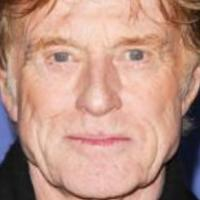

In [4]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

78 0


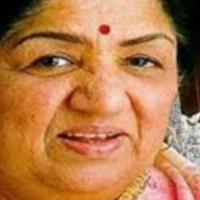

76 1


In [5]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

<ipython-input-6-93eb04555b5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

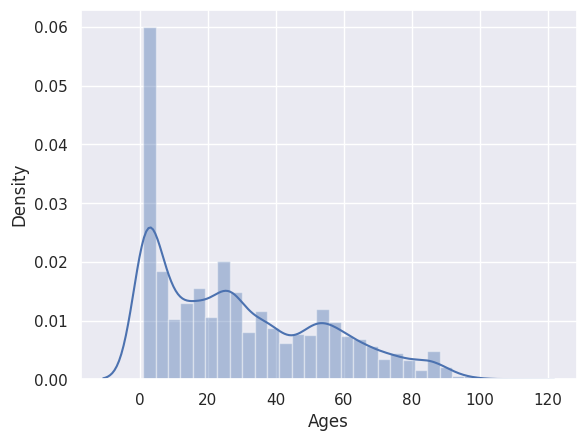

In [6]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [7]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

<ipython-input-8-a7a5f7a80614>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

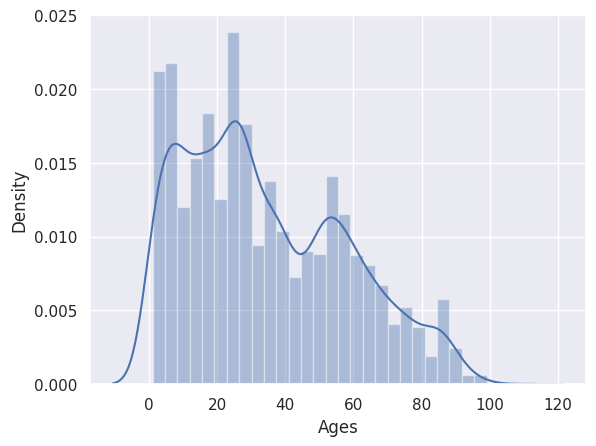

In [8]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [9]:
df = df[df['Ages'] < 80]

<ipython-input-10-0d3133344172>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

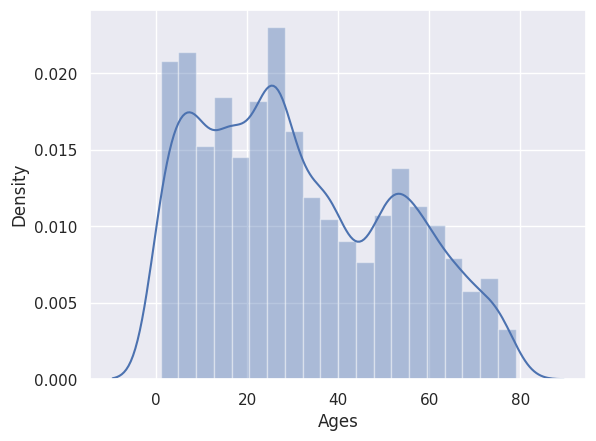

In [10]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [11]:
df['Genders'].value_counts()

Genders
1    4384
0    3486
3       1
Name: count, dtype: int64

<ipython-input-12-bd68d69f286a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genders', data=df, palette='Set2')


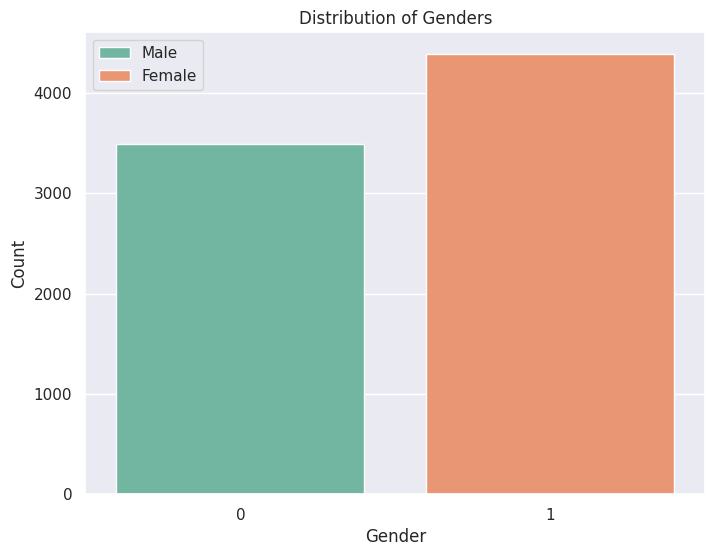

In [12]:
df = df[df['Genders'] != 3]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

plt.figure(figsize=(8, 6))
sns.countplot(x='Genders', data=df, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.legend(labels=['Male', 'Female'])
plt.show()

In [17]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

Streaming output truncated to the last 5000 lines.
<ipython-input-17-2edc7605130b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
<ipython-input-17-2edc7605130b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.LANCZOS)
<ipython-input-17-2edc7605130b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [18]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [19]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

In [20]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=10, shuffle=True, validation_data=test1)

Epoch 1/10
197/197 [==============================] - 64s 319ms/step - loss: 535.9618 - val_loss: 416.7075
Epoch 2/10
197/197 [==============================] - 64s 323ms/step - loss: 426.2042 - val_loss: 321.8737
Epoch 3/10
197/197 [==============================] - 64s 322ms/step - loss: 389.9669 - val_loss: 360.6852
Epoch 4/10
197/197 [==============================] - 65s 326ms/step - loss: 364.9384 - val_loss: 272.5701
Epoch 5/10
197/197 [==============================] - 63s 321ms/step - loss: 360.7338 - val_loss: 285.2878
Epoch 6/10
197/197 [==============================] - 63s 320ms/step - loss: 352.6286 - val_loss: 312.6238
Epoch 7/10
197/197 [==============================] - 63s 320ms/step - loss: 344.7924 - val_loss: 258.2499
Epoch 8/10
197/197 [==============================] - 65s 327ms/step - loss: 331.6073 - val_loss: 260.7014
Epoch 9/10
197/197 [==============================] - 64s 322ms/step - loss: 319.3485 - val_loss: 241.2912
Epoch 10/10
197/197 [================

In [22]:
genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [23]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=10, shuffle=True, validation_data=test2)

Epoch 1/10
99/99 [==============================] - 63s 624ms/step - loss: 0.6468 - accuracy: 0.6493 - val_loss: 0.5512 - val_accuracy: 0.7325
Epoch 2/10
99/99 [==============================] - 63s 628ms/step - loss: 0.5599 - accuracy: 0.7179 - val_loss: 0.4976 - val_accuracy: 0.7700
Epoch 3/10
99/99 [==============================] - 63s 634ms/step - loss: 0.5271 - accuracy: 0.7432 - val_loss: 0.4629 - val_accuracy: 0.7840
Epoch 4/10
99/99 [==============================] - 62s 621ms/step - loss: 0.4993 - accuracy: 0.7624 - val_loss: 0.4757 - val_accuracy: 0.7732
Epoch 5/10
99/99 [==============================] - 62s 624ms/step - loss: 0.4767 - accuracy: 0.7733 - val_loss: 0.4129 - val_accuracy: 0.7986
Epoch 6/10
99/99 [==============================] - 62s 626ms/step - loss: 0.4603 - accuracy: 0.7872 - val_loss: 0.4005 - val_accuracy: 0.8158
Epoch 7/10
99/99 [==============================] - 61s 612ms/step - loss: 0.4500 - accuracy: 0.7976 - val_loss: 0.4033 - val_accuracy: 0.8062

In [29]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.LANCZOS)

    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)

    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'

    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.LANCZOS)

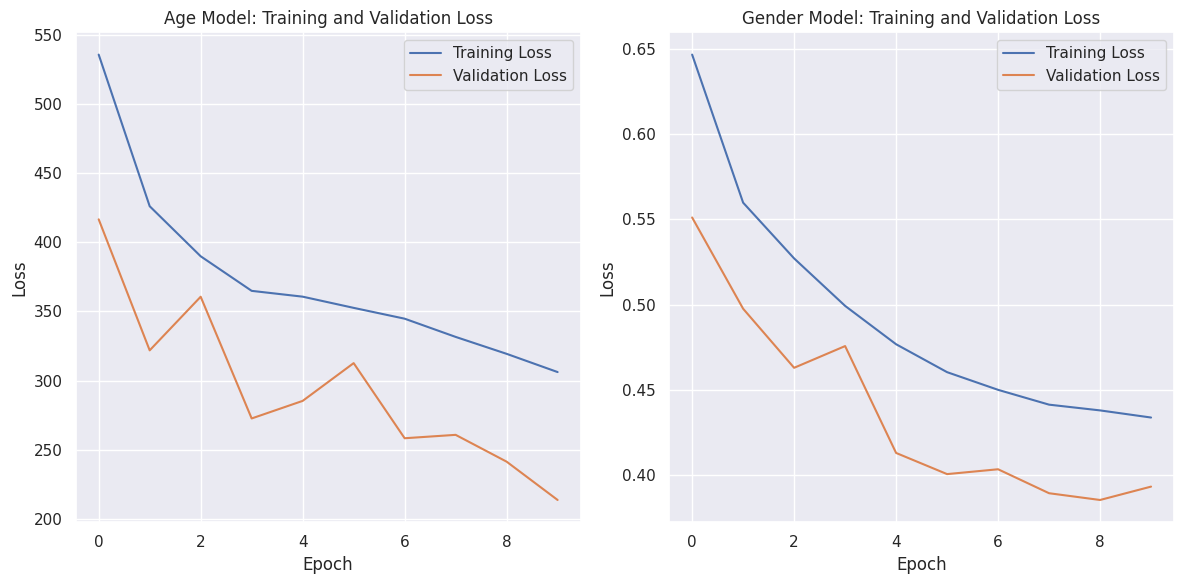

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Age Model: Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Gender Model: Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 84ms/step
Age: 29 
 Gender: female


<ipython-input-29-c3e248631693>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


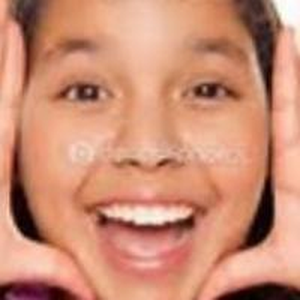

In [30]:
process_and_predict(folder_path+'9_1_4_20170103213057382.jpg.chip.jpg')

1/1 [==============================] - 0s 31ms/step
Age: 43 
 Gender: male


<ipython-input-29-c3e248631693>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


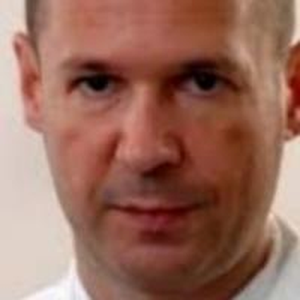

In [31]:
process_and_predict(folder_path+'42_0_0_20170104210426844.jpg.chip.jpg')

1/1 [==============================] - 0s 32ms/step
Age: 30 
 Gender: male


<ipython-input-29-c3e248631693>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


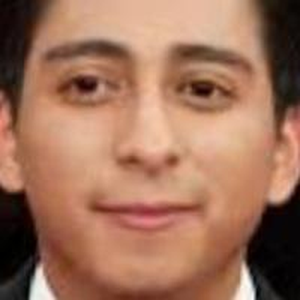

In [33]:
process_and_predict(folder_path+'17_0_4_20170103234631508.jpg.chip.jpg')

In [34]:
agemodel.save('agemodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
genmodel.save('genmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
